In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import geopandas as gpd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("./crawled/swiss_ai_universities.csv", encoding='latin-1', sep=',')
df.head()

,name_of_university,name_of_course,course_code,degree,total_semesters,total_credits,online_offline,teaching_language,course_fee
0,ETH Zurich,Bachelor Computer Science,NaN,Bachelor,6.0,180,Offline,English/German/French/Italian,730.0
1,University of Zurich,Computational Sciences,NaN,Bachelor,3.0,90,Offline,German,NaN
2,EPFL,Computer Science,NaN,Master,4.0,120,Offline,English/German/French/Italian,NaN
3,University of Geneva,Computer Science,NaN,Bachelor,6.0,180,Offline,French,500.0
4,University of Basel,Computational Sciences,NaN,Bachelor,6.0,180,Offline,German,850.0


In [3]:
degree_fee = df.groupby('degree')['course_fee'].mean().reset_index()

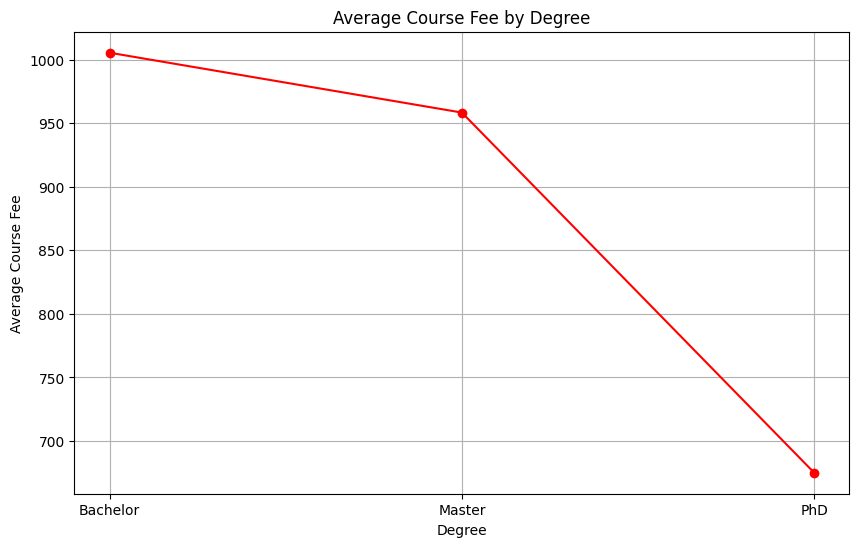

In [4]:
# 1. Line Plot
plt.figure(figsize=(10, 6))
plt.plot(degree_fee['degree'], degree_fee['course_fee'], marker='o', color='red')
plt.title('Average Course Fee by Degree')
plt.xlabel('Degree')
plt.ylabel('Average Course Fee')
plt.grid()
plt.savefig('line_plot.png', dpi=300, bbox_inches='tight')
plt.show()

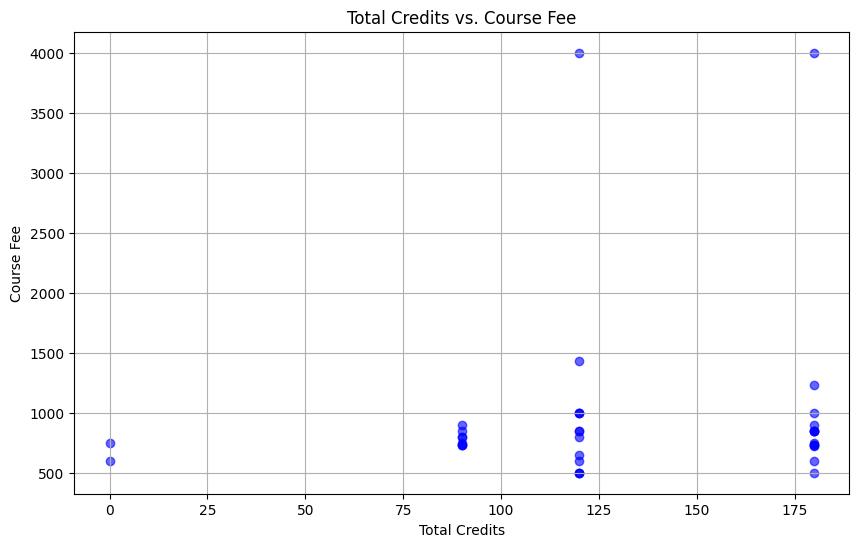

In [5]:
# 2. Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['total_credits'], df['course_fee'], alpha=0.6, color='blue')
plt.title('Total Credits vs. Course Fee')
plt.xlabel('Total Credits')
plt.ylabel('Course Fee')
plt.grid()
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

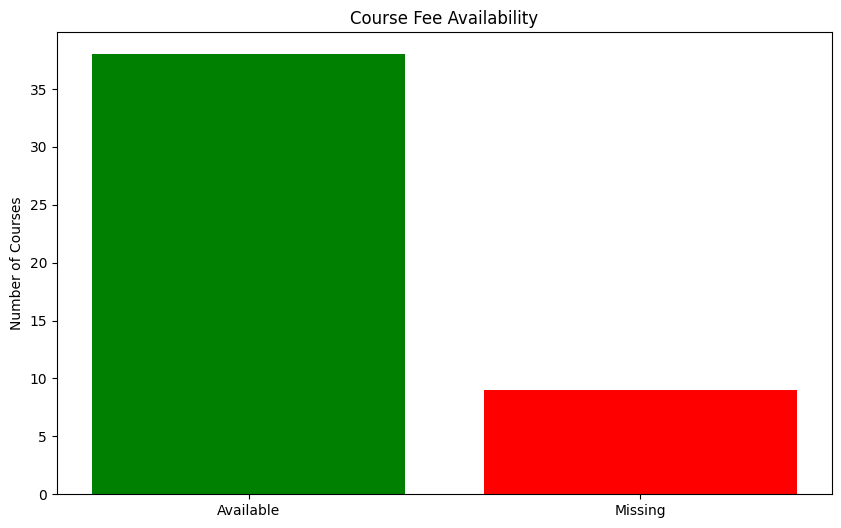

In [6]:
# 3. Visualizing Errors 
plt.figure(figsize=(10, 6))
missing_fee = df['course_fee'].isnull().sum()
plt.bar(['Available', 'Missing'], [len(df) - missing_fee, missing_fee], color=['green', 'red'])
plt.title('Course Fee Availability')
plt.ylabel('Number of Courses')
plt.savefig('errors.png', dpi=300, bbox_inches='tight')
plt.show()

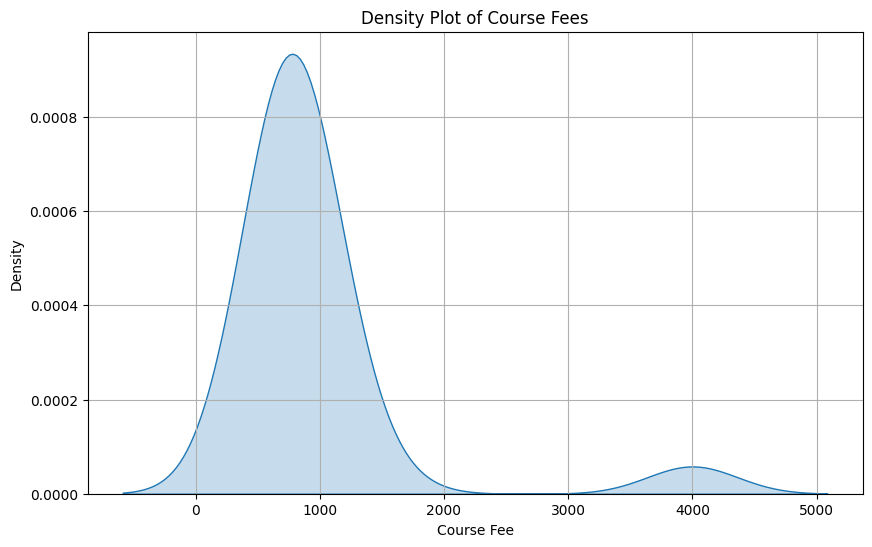

In [7]:
# 4. Density and Contour Plots
plt.figure(figsize=(10, 6))
sns.kdeplot(df['course_fee'].dropna(), fill=True)
plt.title('Density Plot of Course Fees')
plt.xlabel('Course Fee')
plt.ylabel('Density')
plt.grid()
plt.savefig('density.png', dpi=300, bbox_inches='tight')
plt.show()

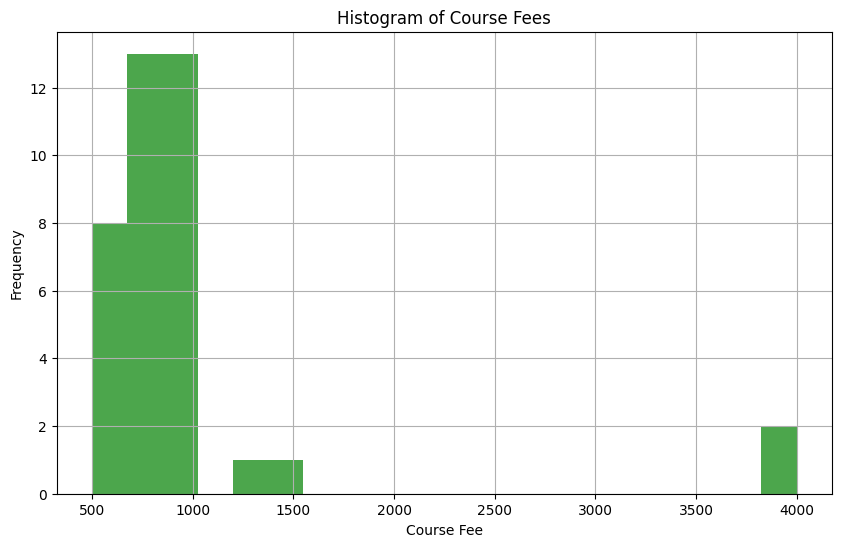

In [8]:
# 5. Histogram and Density Plot
plt.figure(figsize=(10, 6))
plt.hist(df['course_fee'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Histogram of Course Fees')
plt.xlabel('Course Fee')
plt.ylabel('Frequency')
plt.grid()
plt.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.show()

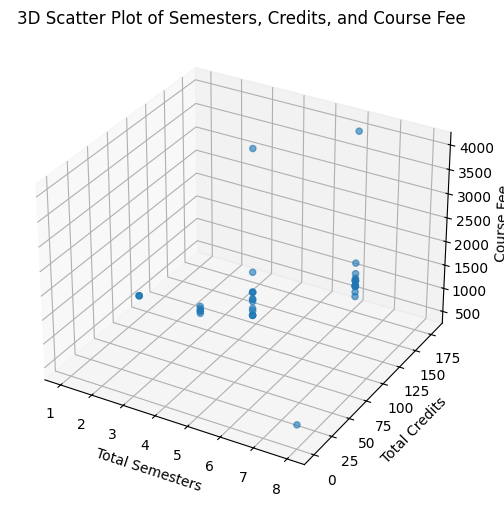

In [9]:
# 6. Three-Dimensional Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['total_semesters'], df['total_credits'], df['course_fee'], alpha=0.6)
ax.set_xlabel('Total Semesters')
ax.set_ylabel('Total Credits')
ax.set_zlabel('Course Fee')
plt.title('3D Scatter Plot of Semesters, Credits, and Course Fee')
plt.savefig('three_dimensional.png', dpi=300, bbox_inches='tight')
plt.show()

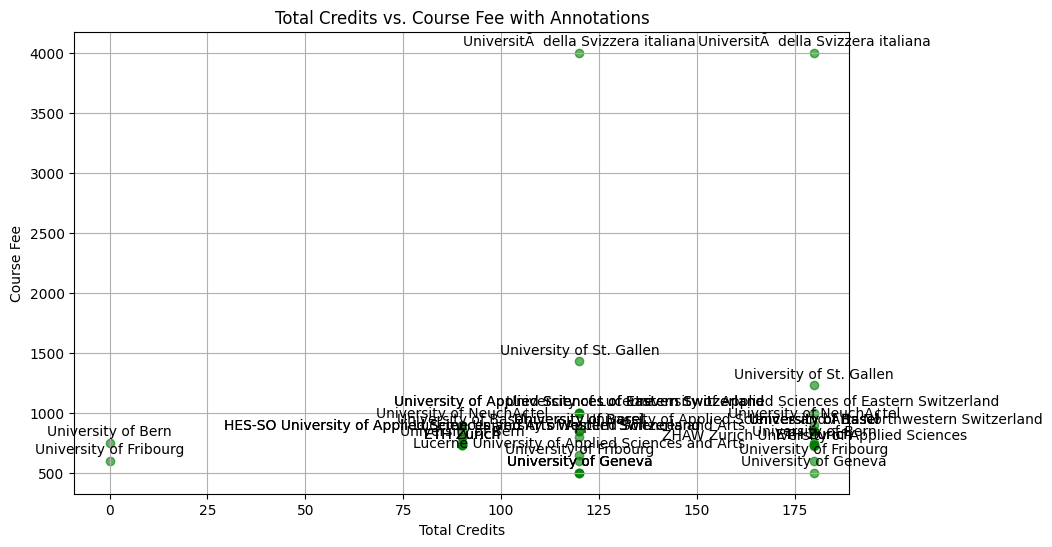

In [10]:
# 8. Text and Annotation
plt.figure(figsize=(10, 6))
plt.scatter(df['total_credits'], df['course_fee'], alpha=0.6, color="green")
for i in range(len(df)):
    plt.annotate(df['name_of_university'].iloc[i], 
                 (df['total_credits'].iloc[i], df['course_fee'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center')
plt.title('Total Credits vs. Course Fee with Annotations')
plt.xlabel('Total Credits')
plt.ylabel('Course Fee')
plt.grid()
plt.savefig('annotation.png', dpi=300, bbox_inches='tight')
plt.show()